In [427]:
import numpy as np
import matplotlib.pyplot as plt
import requests


# Problema No 1

#### Para el $CH_{4(g)}$ calcule los coeficientes de la ecuación de Shomate utilizando los datos de $C_p$ de la tabla de JANAF. https://janaf.nist.gov/tables/C-067.txt en el intervalo de temperatura 0-1200 K

In [428]:
#se importa el link
url="https://janaf.nist.gov/tables/C-067.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]
for x in datos:
    s=x.split("\t")
    print (s)
    mat.append([float(a) for a in (s)])
mat=np.array(mat)


['100', '33.258', '149.500', '216.485', '-6.698', '-69.644', '-64.353', '33.615']
['200', '33.473', '172.577', '189.418', '-3.368', '-72.027', '-58.161', '15.190']
['250', '34.216', '180.113', '186.829', '-1.679', '-73.426', '-54.536', '11.395']
['298.15', '35.639', '186.251', '186.251', '0.', '-74.873', '-50.768', '8.894']
['300', '35.708', '186.472', '186.252', '0.066', '-74.929', '-50.618', '8.813']
['350', '37.874', '192.131', '186.694', '1.903', '-76.461', '-46.445', '6.932']
['400', '40.500', '197.356', '187.704', '3.861', '-77.969', '-42.054', '5.492']
['450', '43.374', '202.291', '189.053', '5.957', '-79.422', '-37.476', '4.350']
['500', '46.342', '207.014', '190.614', '8.200', '-80.802', '-32.741', '3.420']
['600', '52.227', '215.987', '194.103', '13.130', '-83.308', '-22.887', '1.993']
['700', '57.794', '224.461', '197.840', '18.635', '-85.452', '-12.643', '0.943']
['800', '62.932', '232.518', '201.675', '24.675', '-87.238', '-2.115', '0.138']
['900', '67.601', '240.205', '20

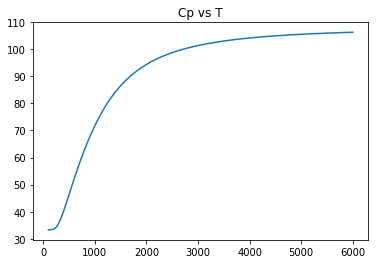

In [429]:
T=mat[:,0]#se calcula la Cp vs T
Cp=mat[:,1]
plt.plot(T,Cp)
plt.title("Cp vs T")
plt.show()

In [430]:
#Constantes de ShomateT=T[3:16]
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ -0.42317857, 107.50201452, -41.34537789,   5.39384261,
         0.67123974])

In [431]:
Cp_calc=beta.dot(X.T)#cp calculda

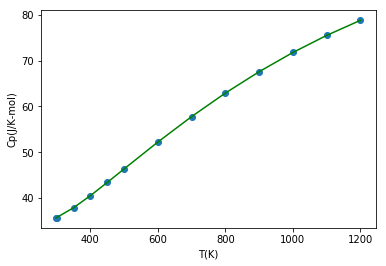

In [432]:
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="green")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()

In [433]:
#Datos obtenidos para realizar los siguientes calculos 
A=-0.42317857
B=107.50201452
C=-41.34537789  
D=5.39384261
E=0.67123974
# datos obtenidos desde la tabla de janaf.
deltaH_298=-74.873 #kJ/mol
deltaS_298=186.251

In [434]:
#Calculos de Cp calc para H,para S y G.dT=0.1
T=np.arange(298,1200,dT) 
t=T/1000
Cp_CH4=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_CH4=np.cumsum(Cp_CH4*dT)+deltaH_298*1000 # se mutipica por mil porque estan en kJ/mol para calcular delta H.
deltaS_CH4=np.cumsum(Cp_CH4/T*dT)+deltaS_298
deltaG_CH4=deltaH_CH4-T*deltaS_CH4

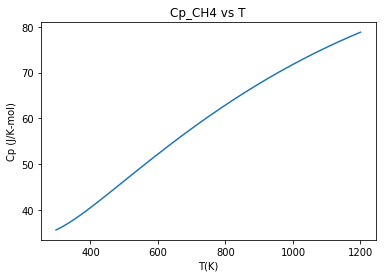

In [435]:
#Cp_CH4 vs T
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T 
Cp_CH4=X.dot(beta)
plt.plot(T,Cp_CH4)
plt.title("Cp_CH4 vs T")
plt.xlabel("T(K)")
plt.ylabel("Cp (J/K-mol)")
plt.show()

[-74869.43578071 -74865.87122553 -74862.30633401 ... -21616.05736441
 -21608.1751211  -21600.29256976]


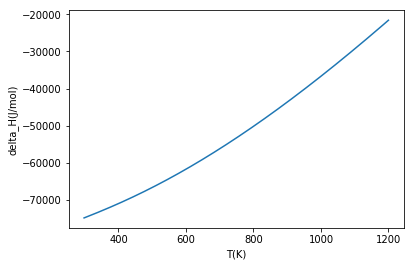

In [436]:
#grafica de entalpia 
plt.plot(T,deltaH_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_H(J/mol)")
print(deltaH_CH4)
plt.show()

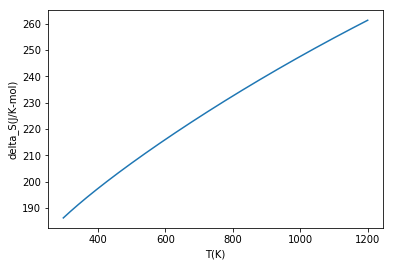

In [437]:
# calculo de s
plt.plot(T,deltaS_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_S(J/K-mol)")
plt.show()

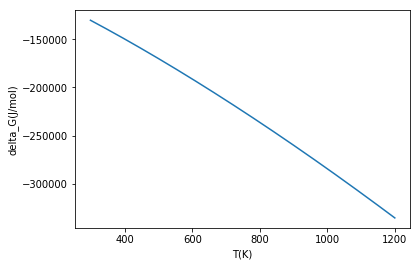

In [438]:
# calculo de G
plt.plot(T,deltaG_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_G(J/mol)")
plt.show()

# Problema No 2#

##### Calcule la constante de equilibrio para el sistema: 
$NO_{(g)}+ \frac{1}{2} O_{2(g)} \rightleftharpoons NO_{2(g)}$

a 298 K y p=1 bar
Debe presentar en forma gráfica y analítica la determinación del punto de equilibrio $\xi_{eq}$

NOTA: ESTE PROBLEMA FUE MODIFICADO T COMO Pt. 
T=700, pt=200


In [439]:
#valores extraidos de la tabla de janaf  para calculo del equilibrio
deltaS_NO2=275.988
deltaH_NO2=31.878*1000
deltaS_NO=236.761
deltaH_NO=90.381*1000
deltaS_O2=231.466
deltaH_O2=0*1000
T=700 #temperatura en kelvin 
pt=200 #presion total en bar
R=8.314 #J/K-mol

In [440]:
#calcular delta G
uNO_est=deltaH_NO-T*deltaS_NO
uNO2_est=deltaH_NO2-T*deltaS_NO2
uO2_est=deltaH_O2-T*deltaS_O2
print(uNO_est,uNO2_est,uO2_est)

-75351.69999999998 -161313.6 -162026.2


In [441]:
#determinacion de ecuaciones 
x=np.arange(0.001,1,0.001)
nt=(3/2)-(1/2)*x
n_NO=1-x
n_O2=x
n_NO2=(1/2)-(1/2)*x
X_NO2=n_NO2/nt
X_NO=n_NO/nt
X_O2=n_O2/nt

In [442]:
uNO=uNO_est+R*T*np.log(X_NO)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO*uNO+n_NO2*uNO2+n_O2*uO2

[0.547]


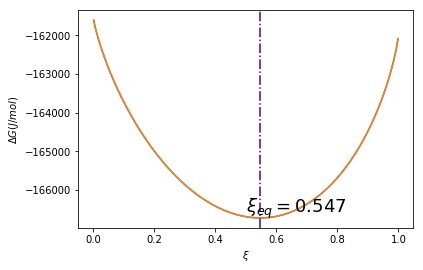

In [443]:
# calculo de el minimo
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)
plt.plot(x,uT)
plt.plot(x,uT)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\Delta G (J/mol)$')
plt.axvline(x=xeq,color="indigo",linestyle="-.")
plt.text(0.5,-166600,r'$\xi_{eq}=$'+str(0.547),fontsize=18)
plt.show()

In [444]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)


[0.547]


In [445]:
#calculo de Kp
pNO2=((xeq)/(1.5-0.5*xeq))*pt
pNO=((1-xeq)/(1.5-0.5*xeq))*pt
pO2=((0.5-0.5*xeq)/(1.5-0.5*xeq))*pt

Kp=(pNO2)/(pNO*pO2**0.5)
print(Kp)

[0.19868899]


# Problema No 3

###### El DNA es una secuencia de nucleótidos de las bases nitrogenadas A,G,C,T
###### Diseñe una función que genere una cadena o secuencia aleatoria de 1000 bases nitrogenadas.
###### A partir de esta secuencia determine el número de bases de cada clase y contruya un histograma que represente dichos datos 

In [454]:
import numpy as np 
from numpy.random import randn 
import pandas as pd 
from scipy import stats 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [458]:
from random import choice

n = 1000 # cantidad de valores que quiero generar 
BasesNitrogenadas = "AGCT" # valor que quiero generar 

cadena = ""
cadena = cadena.join([choice(BasesNitrogenadas) for i in range(n)])# ecuacion para generar los valores
print(cadena) 

AGCATCGCTCAGTTATCGTTGTGGCGCCCCCGCACACTAAGCGCGCGATGGTAAGTTAGGACGCGAACTGTTCACCGGGCGGGTACCGTCGGAATTGGAGATTACATCCCATAAGGGCCGGACTGGCAATATTTGTTAGGACTGTATCCTGGAAATCGGGGGCAAGCGTAGTTTTCTACCCGTGCTGGAGAACATAGGTCAGGTTTTCCTAACAGAAAATAATTTAGTCCCACGCATCACACAACTCCCGTGTAAGTCCGACCAAGCTACGACGACTTGCCGGCGACTCATAATTCATAGATCCCAGAAGTGCTGGTATCGAGCTTTGCATTCCTTGAATGAAATGCGGTTGCTTAGCAAAAAACAAGCACAGTGCAATAAACCGAACACGTTAGCAGGTTCGGCTTATGGGCTTGACTATCCATCAAAGTTCCCATGCTAGGCTCCTGCCTACCCTGTCGGCTGGATTCTATTTCTTCGGTGGTGCTCCCTGATAAAGCTCGCCTGGCCATTCGCCCTTCGGGGCTAGGTTTTCACGTTATTTACGCCAGGTGCGTAGAGTGGGTGCTTCACGACCGTAGTGGGGCGCCTCCATCCCCCTTCGTTTTGTGCTATGTCGCACGCATTTATCAAGCCTGCTCAGATTAGCCATTTGGTTCTCGGCTCAATAAAGACAGAAGGAATTAGATTTATACATCACTTCGGGCGGGGAGACTAACAAGGGGGGGCATGGTTGGCCGTCCATCGCATAAAAGGGCTTGGCACTGCGCAGGCACCCACGACGGGGTGGCGCGTATTCAACAGCTTAGAAGCGACTGCAACTCTACGCGAATACTGGGATAAATAATCATATCGCCGGACTACAAGGTCAAAGTGCGGCCCGTAATCAGGTCGCGCGAGACTGGGGGTATGCTAACACACGGCAAGGGAGCAGGGTGGAACCCCCTCGTTCTCGGATCCGCCACGGAGGCCATACAAGCGATTTCGATCGGCAGATCAT

In [459]:
# imprimir la cantidad que hay de cada  base nitrogenada, estan impresa en orden como se presenta.
A=cadena.count("A")
print (A)
G=cadena.count("G")
print(G)
T=cadena.count("T")
print (T)
C=cadena.count("C")
print(C)

239
269
234
258


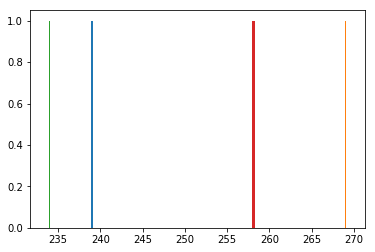

In [460]:
#creacion de un histograma. 
plt.hist(A,bins=5)
plt.hist(G,bins=12)
plt.hist(T,bins=9)
plt.hist(C,bins=4)
plt.show()